Loading transfusion data...

📊 Basic Dataset Information:
Dataset shape: (748, 5)

First 5 rows:
   Recency  Frequency  Monetary  Time  Target
0        2         50     12500    98       1
1        0         13      3250    28       1
2        1         16      4000    35       1
3        2         20      5000    45       1
4        1         24      6000    77       0

📋 Data Types:
Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Target       int64
dtype: object

📈 Statistical Summary:
           count         mean          std    min     25%     50%     75%  \
Recency    748.0     9.506684     8.095396    0.0    2.75     7.0    14.0   
Frequency  748.0     5.514706     5.839307    1.0    2.00     4.0     7.0   
Monetary   748.0  1378.676471  1459.826781  250.0  500.00  1000.0  1750.0   
Time       748.0    34.282086    24.376714    2.0   16.00    28.0    50.0   
Target     748.0     0.237968     0.426124    0.0    0.00     0.0     0.0   

               m

C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_col, data=df, palette="viridis")


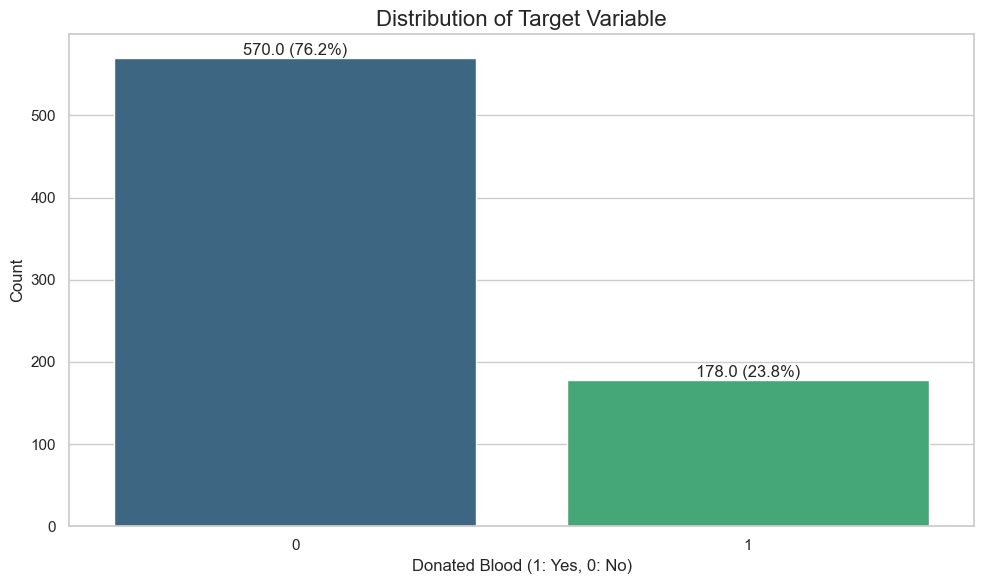


Target class distribution:
        Count  Percentage
Target                   
0         570   76.203209
1         178   23.796791

Class imbalance ratio: 3.20

📊 Feature Distributions:


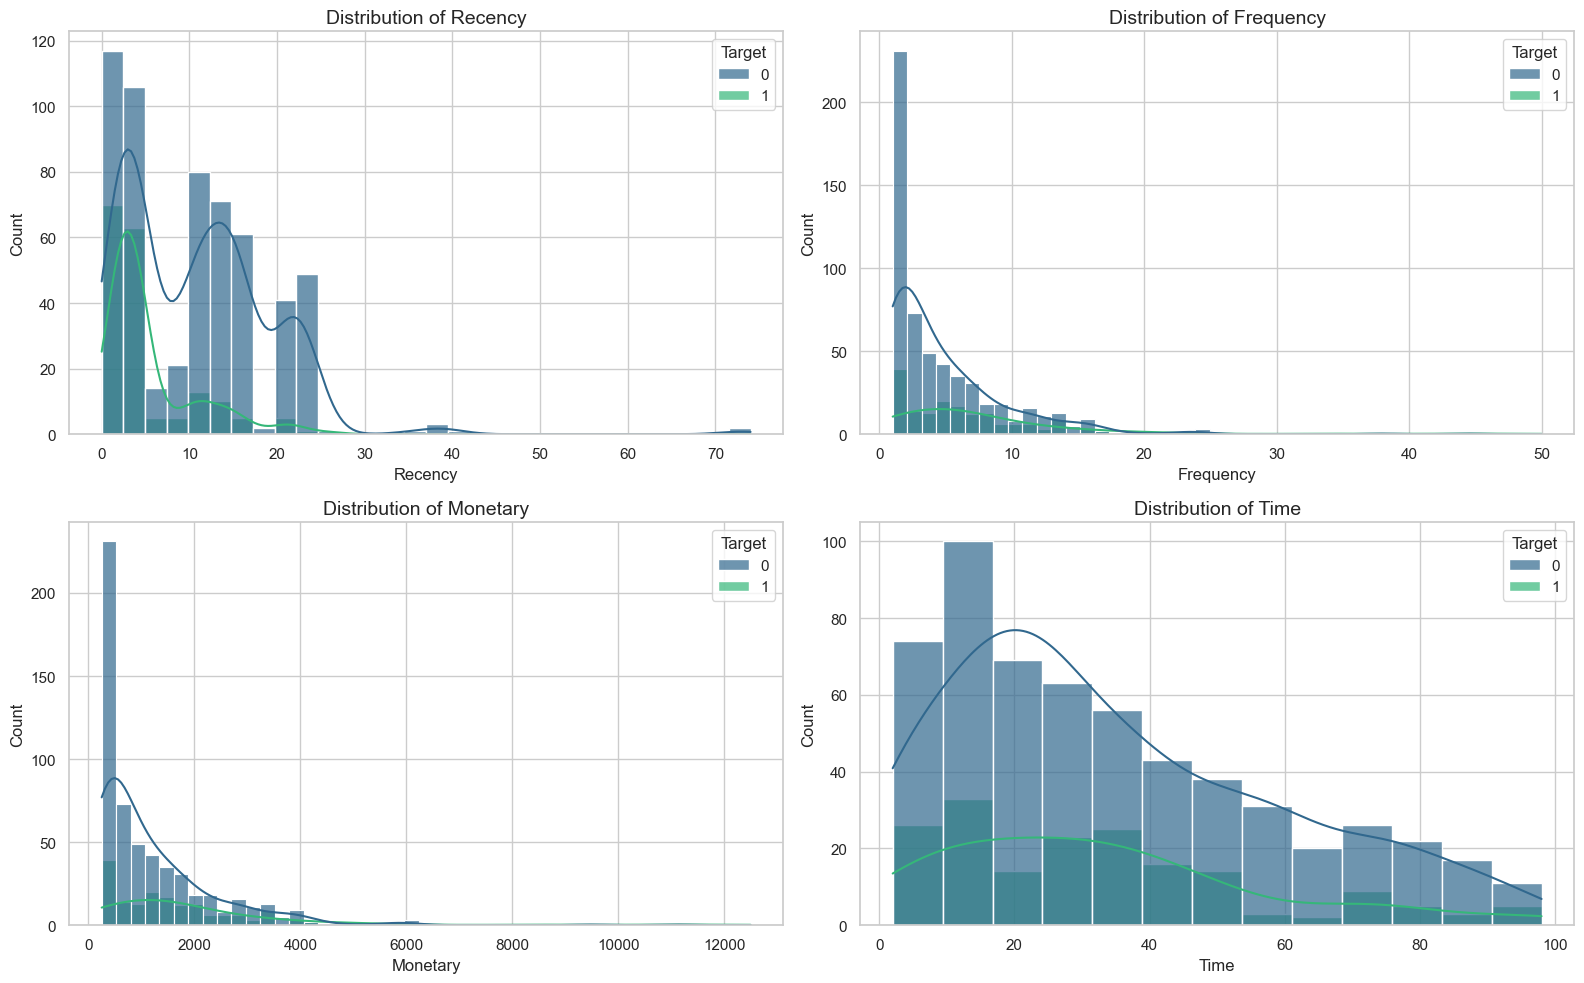

C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:106: Fu

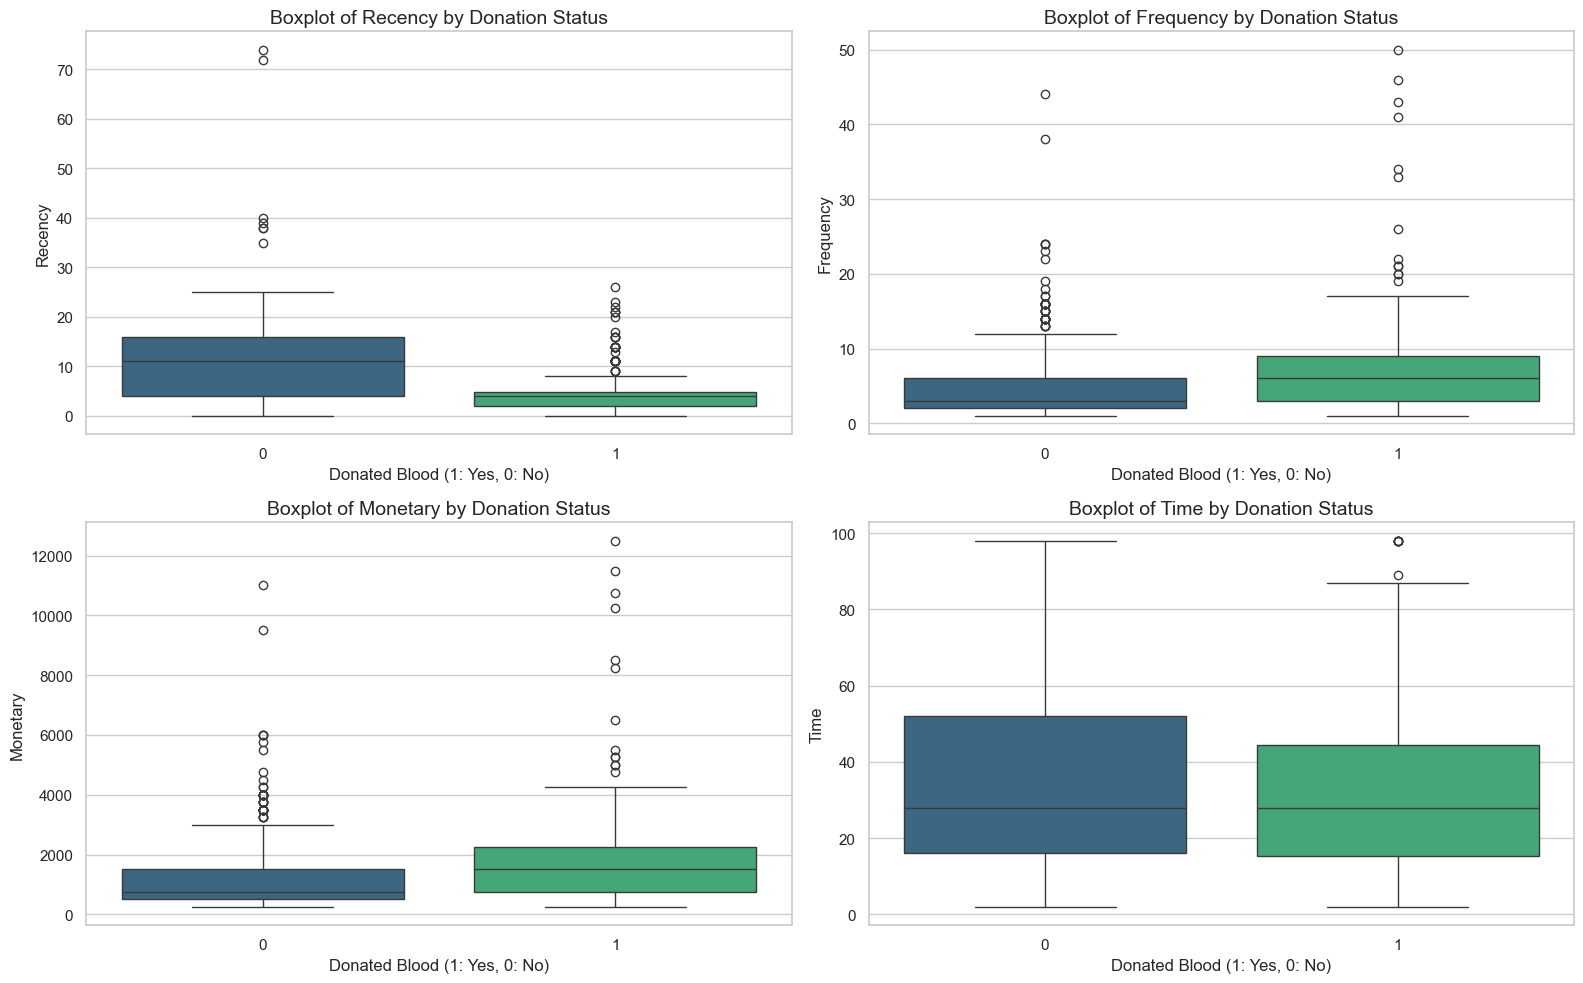


📊 Correlation Analysis:


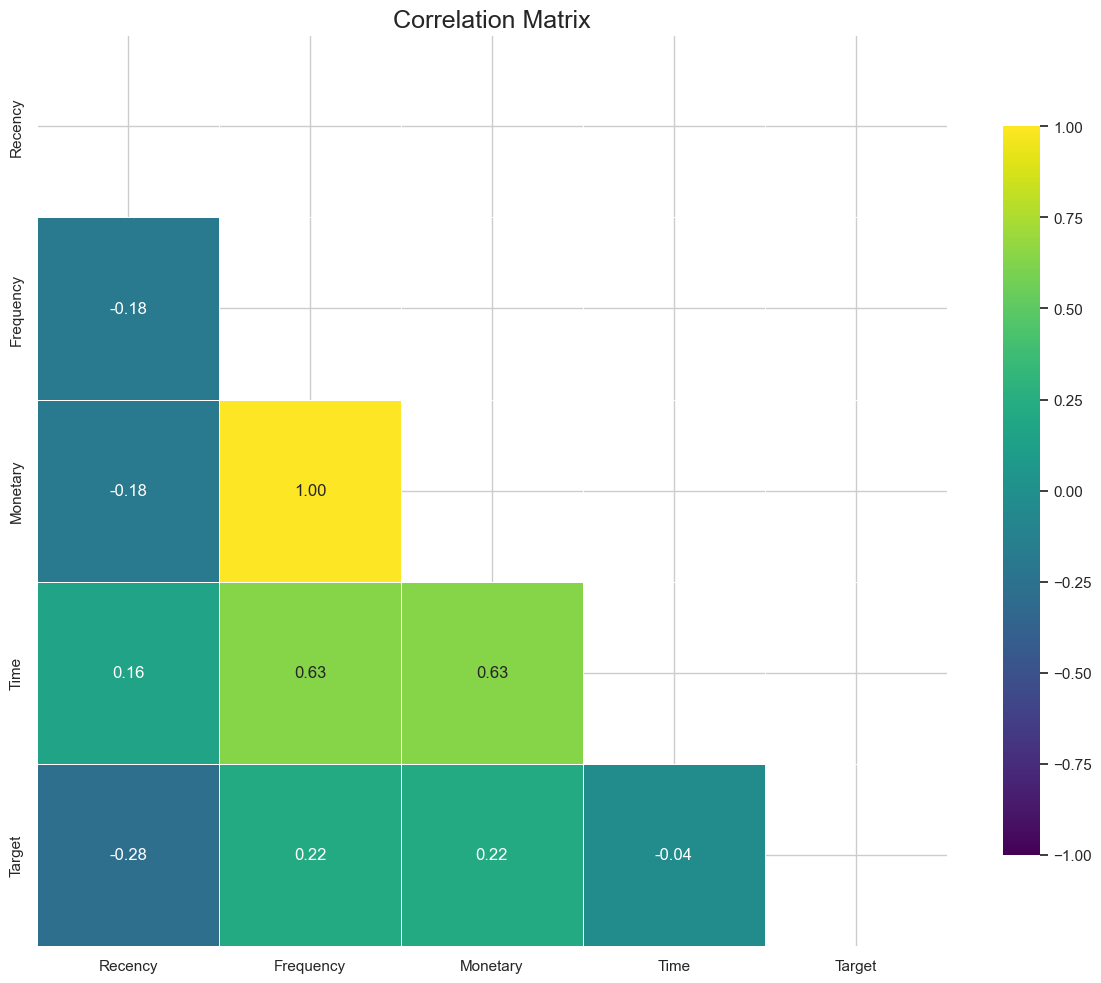


Feature correlations with target variable:
Target       1.000000
Monetary     0.218633
Frequency    0.218633
Time        -0.035854
Recency     -0.279869
Name: Target, dtype: float64


<Figure size 1600x1200 with 0 Axes>

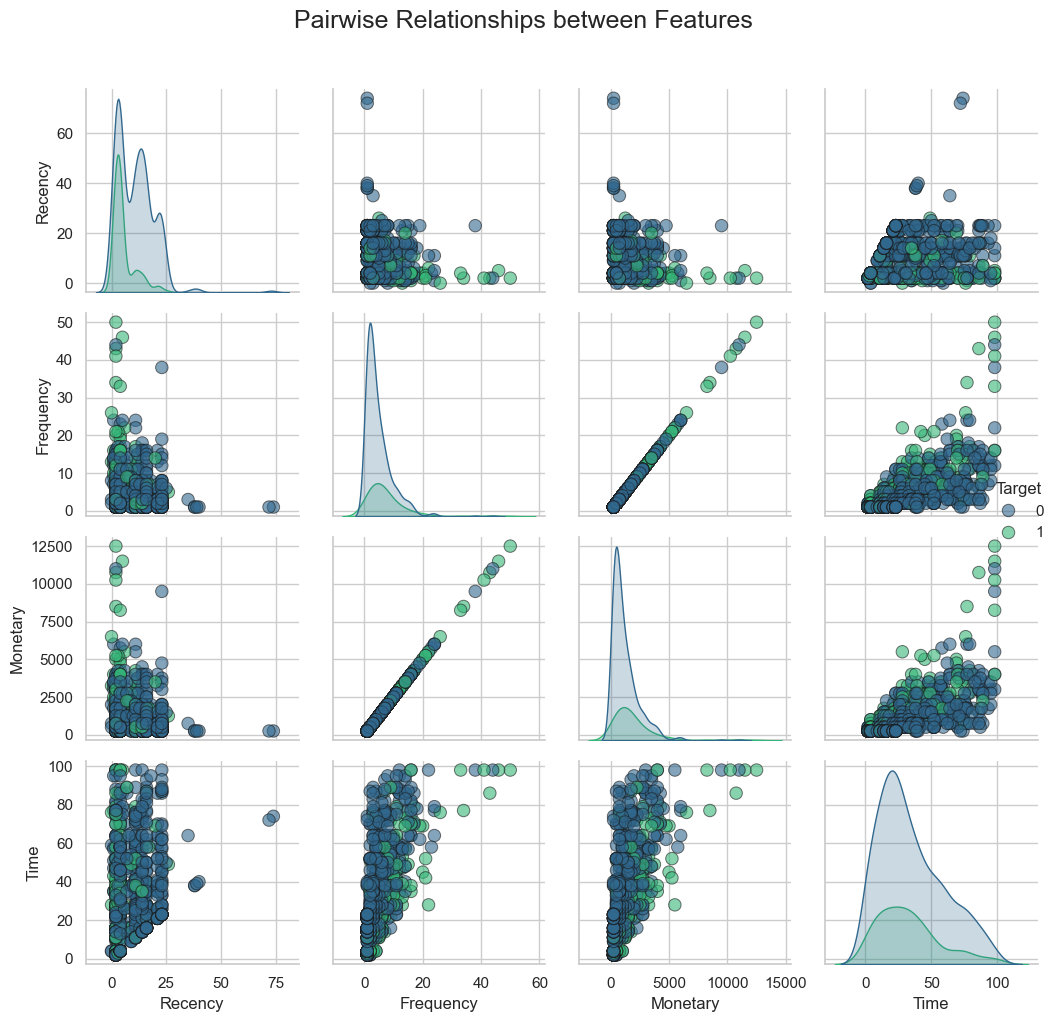


🔍 Outlier Detection:


C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')
C:\Users\pc\AppData\Local\Temp\ipykernel_3692\1348979524.py:149: FutureWarning: 

Passing `palette` without a

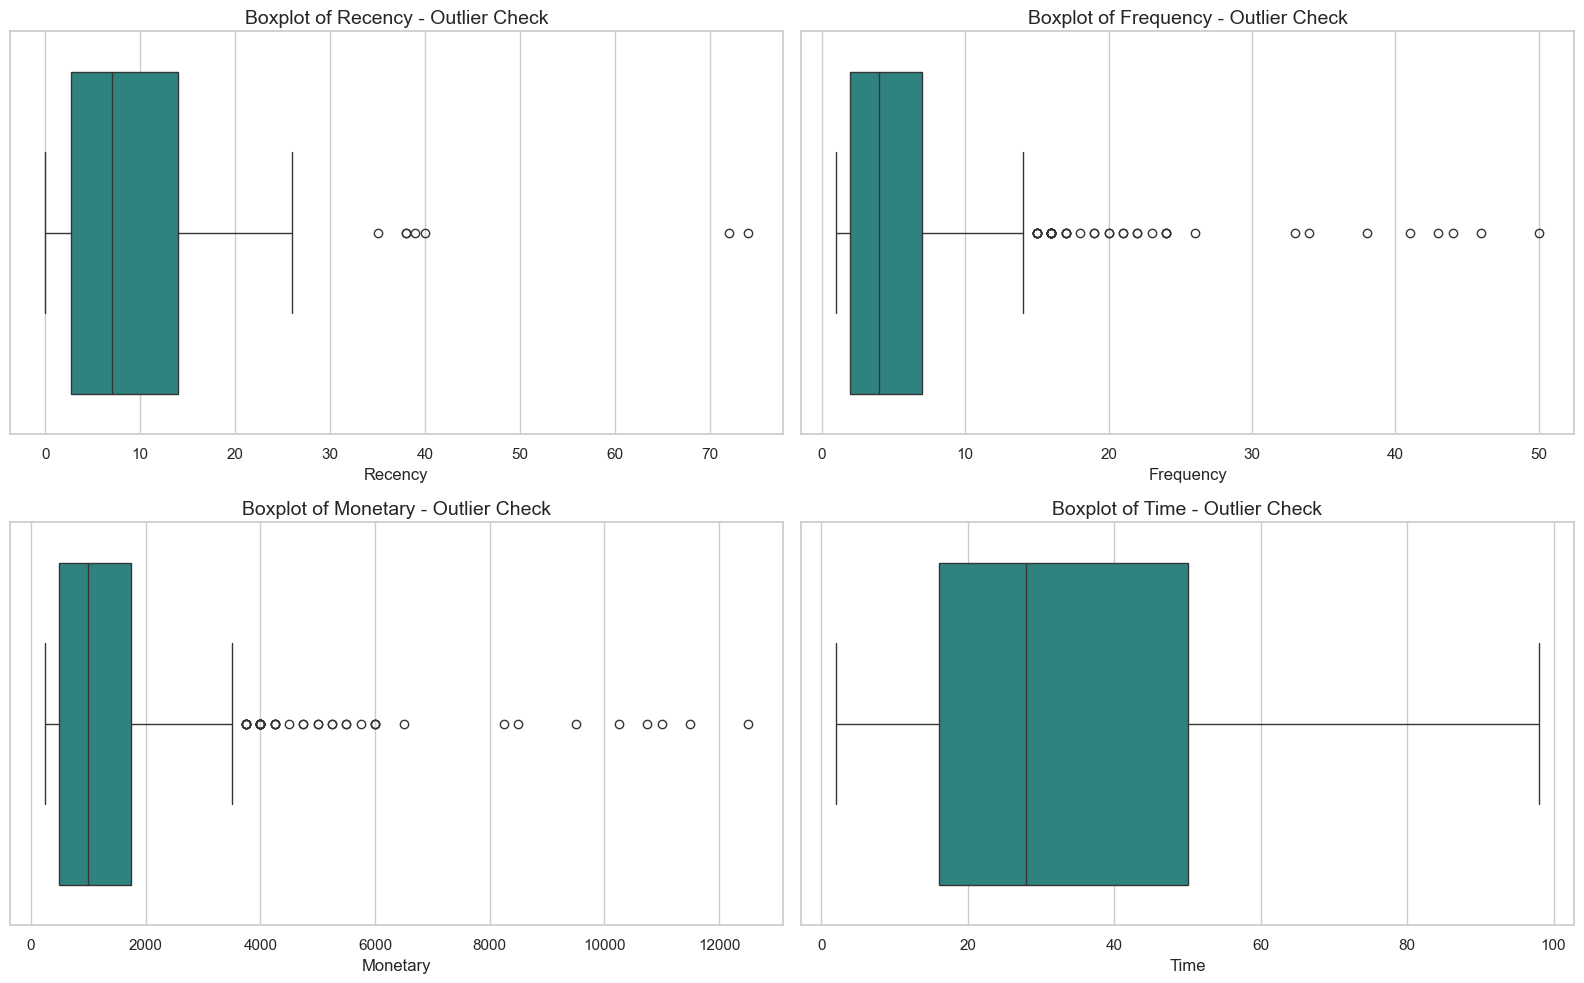


Number of outliers detected (Z-score method): 19
Outlier examples:
     Recency  Frequency  Monetary  Time  Target
0          2         50     12500    98       1
4          1         24      6000    77       0
9          5         46     11500    98       1
115       11         24      6000    64       0
341       23         38      9500    98       0

🔧 Potential Feature Engineering Ideas:
1. Recency-Frequency-Monetary (RFM) Analysis
2. Ratio features like (donations/months since first)
3. Time since last donation categories
4. Frequency categories (regular, occasional, rare)
5. Total volume donated estimation

🔄 Data Preprocessing Recommendations:
1. Standardization/Normalization: Scale features for model training
2. Handle class imbalance: Consider SMOTE, class weights, or other techniques
3. Remove outliers or cap extreme values if appropriate
4. Create new features as suggested above

📝 Summary and Key Insights:
1. Dataset contains 748 records with 5 features (including target)


In [3]:
# Blood Donation Data Exploration
# ================================

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# To import modules from src
sys.path.append(os.path.abspath('../src'))

from preprocessing.preprocess import load_data
# Removed the import for create_feature_importance_plot that caused the error

# Set styling for plots
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Load and Inspect the Data
# ==========================

print("Loading transfusion data...")
df = load_data("../data/transfusion.csv")

print("\n📊 Basic Dataset Information:")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print("\n📋 Data Types:")
print(df.dtypes)

print("\n📈 Statistical Summary:")
print(df.describe().T)

# Check for missing values
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("Great! No missing values found in the dataset.")

# 2. Target Variable Analysis
# ==========================

print("\n🎯 Target Variable Distribution:")
target_col = 'whether he/she donated blood in March 2007' if 'whether he/she donated blood in March 2007' in df.columns else df.columns[-1]

# Count plot for target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=target_col, data=df, palette="viridis")
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Donated Blood (1: Yes, 0: No)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count and percentage annotations
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{count} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., count), 
                ha = 'center', va = 'bottom', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTarget class distribution:")
target_counts = df[target_col].value_counts()
target_percentages = df[target_col].value_counts(normalize=True) * 100
target_stats = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percentages
})
print(target_stats)

print(f"\nClass imbalance ratio: {target_counts.max() / target_counts.min():.2f}")

# 3. Feature Distribution Analysis
# ==============================

print("\n📊 Feature Distributions:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Histograms for numeric features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True, hue=target_col, palette='viridis', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Box plots for numeric features by target
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=target_col, y=col, palette='viridis')
    plt.title(f'Boxplot of {col} by Donation Status', fontsize=14)
    plt.xlabel('Donated Blood (1: Yes, 0: No)', fontsize=12)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

# 4. Correlation Analysis
# =====================

print("\n📊 Correlation Analysis:")
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='viridis', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()
plt.show()

# Display correlations with target
print("\nFeature correlations with target variable:")
target_corr = corr_matrix[target_col].sort_values(ascending=False)
print(target_corr)

# 5. Feature Pair Relationships
# ==========================

# Pairplot to visualize relationships between features
plt.figure(figsize=(16, 12))
sns.pairplot(df, hue=target_col, palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pairwise Relationships between Features', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

# 6. Outlier Detection
# ==================

print("\n🔍 Outlier Detection:")
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col} - Outlier Check', fontsize=14)
plt.tight_layout()
plt.show()

# Z-score method for outlier detection
z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outliers = df[~filtered_entries]

print(f"\nNumber of outliers detected (Z-score method): {len(outliers)}")
if not outliers.empty:
    print("Outlier examples:")
    print(outliers.head())

# 7. Feature Engineering Ideas
# =========================

print("\n🔧 Potential Feature Engineering Ideas:")
print("1. Recency-Frequency-Monetary (RFM) Analysis")
print("2. Ratio features like (donations/months since first)")
print("3. Time since last donation categories")
print("4. Frequency categories (regular, occasional, rare)")
print("5. Total volume donated estimation")

# 8. Data Preprocessing Recommendations
# ==================================

print("\n🔄 Data Preprocessing Recommendations:")
print("1. Standardization/Normalization: Scale features for model training")
print("2. Handle class imbalance: Consider SMOTE, class weights, or other techniques")
print("3. Remove outliers or cap extreme values if appropriate")
print("4. Create new features as suggested above")

# 9. Summary and Insights
# =====================

print("\n📝 Summary and Key Insights:")
print("1. Dataset contains", df.shape[0], "records with", df.shape[1], "features (including target)")
print(f"2. Target distribution: {target_counts[1] if 1 in target_counts else 0} donated, {target_counts[0] if 0 in target_counts else 0} did not donate")
print(f"3. Class imbalance ratio: {target_counts.max() / target_counts.min():.2f}")

# Find most correlated feature with target
most_correlated = target_corr.drop(target_col).abs().idxmax()
correlation_value = target_corr[most_correlated]
print(f"4. Most predictive feature: '{most_correlated}' (correlation: {correlation_value:.3f})")

# Identify features with high correlation
high_corr_pairs = []
for i, col1 in enumerate(corr_matrix.columns):
    for col2 in corr_matrix.columns[i+1:]:
        if abs(corr_matrix.loc[col1, col2]) > 0.7 and col1 != target_col and col2 != target_col:
            high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

if high_corr_pairs:
    print("5. Highly correlated feature pairs:")
    for col1, col2, corr in high_corr_pairs:
        print(f"   - {col1} & {col2}: {corr:.3f}")
else:
    print("5. No highly correlated feature pairs found")

print("\n✅ Exploration Complete")

# If you want to add feature importance later, you can implement the function
# def plot_feature_importance(model, feature_names):
#     plt.figure(figsize=(10, 6))
#     plt.barh(range(len(model.feature_importances_)), model.feature_importances_, align='center')
#     plt.yticks(range(len(model.feature_importances_)), [x for x in feature_names])
#     plt.xlabel('Feature Importance')
#     plt.ylabel('Feature')
#     plt.title('Feature Importance')
#     plt.tight_layout()
#     plt.show()

# Save the preprocessed data if needed
# from preprocessing.preprocess import preprocess_data, split_data
# from utils.utils import save_scaler
# X_scaled, y, scaler = preprocess_data(df)
# X_train, X_test, y_train, y_test = split_data(X_scaled, y)
# save_scaler(scaler, path="../data/scaler.pkl")